In [2]:
### Plot Regan boundaries - 2019 paper with points obtained by PJS

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from netCDF4 import Dataset

import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import cmocean

In [4]:
from erddapy import ERDDAP

import urllib
try:
    from urllib.parse import unquote
except ImportError:
    from urllib2 import unquote

In [5]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
#plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3

mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [6]:

def erddap_etopo1():
    """get subset of etopo1 data from erddap"""
    
    urllib.request.urlretrieve("http://coastwatch.pfeg.noaa.gov/erddap/griddap/etopo180.nc?altitude[(65):1:(78.0)][(-180.0):1:(-130)]","data/etopo1_tmp.nc")
    
def etopo1_subset(file='etopo1.nc', region=None):
    """ read in ardemV2 topography/bathymetry. """
    
    bathydata = Dataset(file)
    
    topoin = bathydata.variables['altitude'][:]
    lons = bathydata.variables['longitude'][:]
    lats = bathydata.variables['latitude'][:]
    bathydata.close()
    
    return(topoin, lats, lons)


In [41]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(11,8.5),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.Mercator():
        gl = ax.gridlines(draw_labels=True,linestyle='--',color='lightgrey')
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True,linestyle='--',color='lightgrey')
        gl.xlabels_top = gl.ylabels_right = False
        ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
        ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)

    return fig, ax


In [42]:
regan_df = pd.read_excel('data/regan_beaufortgyre_position.xlsx')

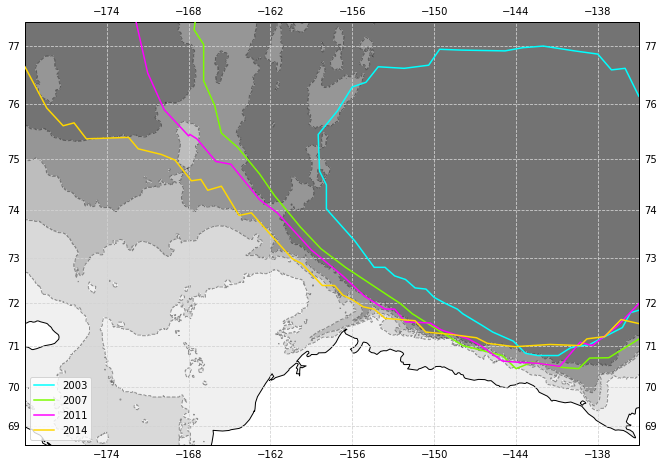

In [43]:
projection=ccrs.Mercator()
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

extent = [-180, -135, 68.5, 76.5]

erddap_etopo1()
(topoin, lats, lons) = etopo1_subset(file='data/etopo1_tmp.nc')

fig,ax = make_map(projection=projection)


ax.plot(regan_df['2003_lon']*-1, regan_df['2003_lat'],
           'cyan',zorder=3,transform=transformation,label='2003')
ax.plot(regan_df['2007_lon']*-1, regan_df['2007_lat'],
           'lawngreen',zorder=3,transform=transformation,label='2007')
ax.plot(regan_df['2011_lon']*-1, regan_df['2011_lat'],
           'magenta',zorder=3,transform=transformation,label='2011')
ax.plot(regan_df['2014_lon']*-1, regan_df['2014_lat'],
           'gold',zorder=3,transform=transformation,label='2014')

ax.legend()
## bathymetry contours
CS = plt.contour(lons, lats, topoin, [-1000, -200, -100, -50,], 
                 colors='k', alpha=0.4, linewidths=1, zorder=2,
                 transform=transformation)
CS = plt.contourf(lons, lats, topoin, [-1000, -200, -100, -50,], 
                 colors=('#737373','#969696','#bdbdbd','#d9d9d9','#f0f0f0'), extend='both', zorder=1,
                 transform=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)



In [30]:
fig.savefig('Arctic_Regan_ShelfFlow.png',dpi=300)
fig.savefig('Arctic_Regan_ShelfFlow.pdf')